<a href="https://colab.research.google.com/github/ykitaguchi77/YOLACT_Mobius/blob/main/Inference_YOLOv8_instance_segmentation_suzuki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab import drive
import shutil
drive.mount('/content/drive')
#driveのマウント
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
#yolov8
!pip install -r requirements.

from ultralytics import YOLO
model = YOLO("yolov8x.pt")

Mounted at /content/drive
Cloning into 'ultralytics'...
remote: Enumerating objects: 21606, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 21606 (delta 17), reused 34 (delta 10), pack-reused 21549
Receiving objects: 100% (21606/21606), 13.01 MiB | 21.63 MiB/s, done.
Resolving deltas: 100% (15007/15007), done.
/content/ultralytics
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.'


100%|██████████| 131M/131M [00:01<00:00, 118MB/s]


In [ ]:

# model = YOLO("yolov8n-seg.pt")
# results = model('bus.jpg',save=True,task='segment')#/content/ultralytics/bus.jpgを利用
# #Results saved to /content/ultralytics/runs/segment/predictの下に保存される


# Load a model
model = YOLO('yolov8n-seg.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

#学習用
# results = model.train(data='coco128-seg.yaml', epochs=5, imgsz=640)




# コピー元ファイルのパス
source_file_path = '/content/drive/MyDrive/AI_laboratory_course/武市/eyeditect-1.yaml'

# コピー先フォルダのパス
destination_folder = '/content/ultralytics/ultralytics/cfg/datasets'

# shutilモジュールのcopy関数を使用してファイルをコピー
shutil.copy(source_file_path, destination_folder)


#nc = 3に変更
# Load a model
model = YOLO('yolov8n-seg.yaml').load('yolov8n.pt')  # build from YAML and transfer weights


#学習用
# result =  model.train(data='eyeditect-1.yaml', epochs=30, imgsz=640)


# コンフィグは学習時と同じコンフィグでよい
#model = YOLO("/Users/ryuka/workspace/Python/Image_AI/yolov8/ultralytics-main/ultralytics/cfg/models/v8/myyolov8.yaml")  # build a new model from scratch

# bestのモデルを使う,trainのウェイトのベストのパスを指定
model = YOLO("/content/drive/MyDrive/AI_laboratory_course/武市/3foldersbest.pt")  # load a pretrained model (recommended for training)


#画像のパスを入力
img_path = "/content/斜視3.png"
results = model(img_path, save=True)  # predict on an image


100%|██████████| 6.23M/6.23M [00:00<00:00, 70.7MB/s]


Transferred 355/417 items from pretrained weights
Transferred 355/417 items from pretrained weights

image 1/1 /content/斜視3.png: 480x640 1 eyelid, 1 irys, 1 pupil, 1501.2ms
Speed: 16.7ms preprocess, 1501.2ms inference, 114.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/ultralytics/runs/segment/predict


Eyelid 0: Coordinates: 
[[ 47  51]
 [175 114]]
Irys 0: Coordinates: 
[[ 50  54]
 [107 111]]
Pupil 0: Coordinates: 
[[67 65]
 [87 89]]
Pupil center coordinates: [         77          77]
Diameter: 57
斜視角 9.85 度です。


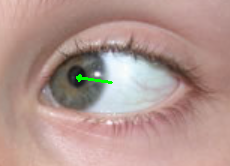

In [ ]:
import numpy as np

eyelid_boxes = []  # eyelidの座標を格納するためのリスト
irys_boxes = []    # irysの座標を格納するためのリスト

result = results[0]  # 検出結果を取得

# 検出されたオブジェクトを一度に処理
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]  # オブジェクトのクラスIDを取得
    cords = box.xyxy[0].tolist()  # バウンディングボックスの座標をリストとして取得
    cords = [round(x) for x in cords]  # 座標を四捨五入

    # クラスIDに応じて対応するリストに座標を追加
    if class_id == 'eyelid':
        eyelid_boxes.append(np.array([[cords[0], cords[1]], [cords[2], cords[3]]]))
    elif class_id == 'irys':
        irys_boxes.append(np.array([[cords[0], cords[1]], [cords[2], cords[3]]]))

# 取得したeyelidのバウンディングボックスの座標を表示
for i, box in enumerate(eyelid_boxes):
    print(f"Eyelid {i}: Coordinates: \n{box}")

# 取得したirysのバウンディングボックスの座標を表示
for i, box in enumerate(irys_boxes):
    print(f"Irys {i}: Coordinates: \n{box}")


# prompt: 同様にして、pupil_boxesを作って

import numpy as np
pupil_boxes = []  # pupilの座標を格納するためのリスト

# 検出されたオブジェクトを一度に処理
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]  # オブジェクトのクラスIDを取得
    cords = box.xyxy[0].tolist()  # バウンディングボックスの座標をリストとして取得
    cords = [round(x) for x in cords]  # 座標を四捨五入

    # クラスIDに応じて対応するリストに座標を追加
    if class_id == 'pupil':
        pupil_boxes.append(np.array([[cords[0], cords[1]], [cords[2], cords[3]]]))

# 取得したpupilのバウンディングボックスの座標を表示
for i, box in enumerate(pupil_boxes):
    print(f"Pupil {i}: Coordinates: \n{box}")


# prompt: eyelid_boxes[0]の二つの座標から重心を出して


eyelid_center = np.mean(eyelid_boxes[0], axis=0)
# print("Eyelid center coordinates:", eyelid_center)
irys_center = np.mean(irys_boxes[0], axis=0)
# print("Irys center coordinates:", irys_center)


pupil_center = np.mean(pupil_boxes[0], axis=0)
print("Pupil center coordinates:", pupil_center)


# prompt: pupil_centerからirys_boxesによって構成される長方形の各辺の長さを調べ、絶対値が一番大きい値をdiameterに代入して

# irys_boxes[0]の左上の座標を取得
irys_top_left = irys_boxes[0][0]

# irys_boxes[0]の右下の座標を取得
irys_bottom_right = irys_boxes[0][1]

# irys_boxes[0]の長方形の幅を計算
irys_width = abs(irys_top_left[0] - irys_bottom_right[0])

# irys_boxes[0]の長方形の高さを計算
irys_height = abs(irys_top_left[1] - irys_bottom_right[1])

# pupil_centerからirys_boxes[0]の長方形の左辺までの距離を計算
left_distance = abs(pupil_center[0] - irys_top_left[0])

# pupil_centerからirys_boxes[0]の長方形の右辺までの距離を計算
right_distance = abs(pupil_center[0] - irys_bottom_right[0])

# pupil_centerからirys_boxes[0]の長方形の上辺までの距離を計算
top_distance = abs(pupil_center[1] - irys_top_left[1])

# pupil_centerからirys_boxes[0]の長方形の下辺までの距離を計算
bottom_distance = abs(pupil_center[1] - irys_bottom_right[1])

# 4辺の長さのうち、絶対値が一番大きい値をdiameterに代入
diameter = max(irys_width, irys_height, left_distance, right_distance, top_distance, bottom_distance)

print("Diameter:", diameter)





#眼球中心からのベクトル
eyelid_vec = np.array([eyelid_center[0], eyelid_center[1], diameter])
iris_vec = np.array([irys_center[0], irys_center[1], diameter])

iris_vec = np.array([irys_center[0], irys_center[1], diameter])
eyelid_vec = np.array([eyelid_center[0], eyelid_center[1], diameter])

# 内積を求める
dot_product = np.dot(iris_vec, eyelid_vec)

# ノルムを求める
iris_norm = np.linalg.norm(iris_vec)
eyelid_norm = np.linalg.norm(eyelid_vec)

# コサインを求める
cos_theta = dot_product / (iris_norm * eyelid_norm)

# ラジアンから度に変換
theta = round(np.arccos(cos_theta) * 180 / np.pi, 2)

# 結果を出力
print("斜視角", theta, "度です。")


from google.colab.patches import cv2_imshow
import cv2

# 画像を読み込む
img = cv2.imread(img_path)

# 矢印の始点と終点を指定
p1 = tuple(int(i) for i in eyelid_center)
p2 = tuple(int(i) for i in pupil_center)  # irys_centerをそのまま使用

# 矢印を描画
cv2.arrowedLine(img, p1, p2, (0, 255, 0), 2)

# 画像を表示
cv2_imshow(img)

In [ ]:
eyelid_boxes

[array([[406, 325],
        [756, 543]])]

In [ ]:
eyelid_center


array([        581,         434])

In [ ]:
pupil_boxes


[array([[476, 355],
        [590, 479]])]

In [ ]:
pupil_center

array([        533,         417])